# Прогнозирование оттока клиентов

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/telecom_churn.csv')
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
print(df.shape) #смотрим на размер данных: (строки, столбцы)

(3333, 20)


In [ ]:
df.columns #названия столбцов

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [ ]:
#Изменяем тип колонки Churn на int64
df['Churn'] = df['Churn'].astype('int64')
#Смотрим на описание данных
df.describe()
#Смотрим на статистику по нечисловым признакам
df.describe(include = ['object', 'bool'])

,State,International plan,Voice mail plan
count,3333,3333,3333
unique,51,2,2
top,WV,No,No
freq,106,3010,2411


In [ ]:
#Смотрим распределение категориальных признаков
df['Churn'].value_counts()
#2850 пользователей из 3333 — лояльные, значение переменной Churn у них — 0

0    2850
1     483
Name: Churn, dtype: int64

In [ ]:
#Указываем значение normalize, чтобы посмотреть относительные частоты в распределении пользователей
df['Area code'].value_counts(normalize = True)

415    0.496550
510    0.252025
408    0.251425
Name: Area code, dtype: float64

In [ ]:
#Cортировать переменные можно по одному и по нескольким столбцам:
df.sort_values(by = ['Churn', 'Total day charge'], ascending = [True, False]).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
688,MN,13,510,No,Yes,21,315.6,105,53.65,208.9,71,17.76,260.1,123,11.70,12.1,3,3.27,3,0
2259,NC,210,415,No,Yes,31,313.8,87,53.35,147.7,103,12.55,192.7,97,8.67,10.1,7,2.73,3,0
534,LA,67,510,No,No,0,310.4,97,52.77,66.5,123,5.65,246.5,99,11.09,9.2,10,2.48,4,0
575,SD,114,415,No,Yes,36,309.9,90,52.68,200.3,89,17.03,183.5,105,8.26,14.2,2,3.83,1,0
2858,AL,141,510,No,Yes,28,308.0,123,52.36,247.8,128,21.06,152.9,103,6.88,7.4,3,2.00,1,0


In [ ]:
#Индексация и извлечение данных
#Для извлечения отдельного столбца можно использовать конструкцию вида DataFrame['Name'].
#Воспользуемся этим для ответа на вопрос: какова доля людей нелояльных пользователей в нашем датафрейме?
df.Churn.mean()

0.14491449144914492

In [ ]:
#Используем логическую индексацию для ответа на вопрос: каковы средние значения числовых признаков среди нелояльных пользователей?
df[df['Churn']==1].mean()

<ipython-input-10-2a57ffaade28>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[df['Churn']==1].mean()


Account length            102.664596
Area code                 437.817805
Number vmail messages       5.115942
Total day minutes         206.914079
Total day calls           101.335404
Total day charge           35.175921
Total eve minutes         212.410145
Total eve calls           100.561077
Total eve charge           18.054969
Total night minutes       205.231677
Total night calls         100.399586
Total night charge          9.235528
Total intl minutes         10.700000
Total intl calls            4.163561
Total intl charge           2.889545
Customer service calls      2.229814
Churn                       1.000000
dtype: float64

In [ ]:
#Скомбинировав предыдущие два вида индексации, ответим на вопрос: сколько в среднем в течение дня разговаривают по телефону нелояльные пользователи?
df[df['Churn'] == 1]['Total day minutes'].mean()

206.91407867494814

In [ ]:
#Какова максимальная длина международных звонков среди лояльных пользователей (Churn == 0), не пользующихся услугой международного роуминга ('International plan' == 'No')?
df[(df['Churn'] == 0)&(df['International plan'] == 'No')]['Total intl minutes'].max()

18.9

In [ ]:
#использование loc для индексации: в случае с loc учитываются и начало, и конец слайса при передаче object объекта
df.loc[0:5, 'State':'Area code']
#аналогично можно сделать и с iloc через индексацию: здесь уже интервалы учитываются в той же логике, что в питоне в целом
df.iloc[0:5, 0:3]

,State,Account length,Area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415


In [ ]:
#Чтобы обратиться к какой-то конкретной строчке датафрейма, используем конструкцию:
df[:1] #если требуется первая строка
df[-1:] #если строка последняя

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.6,241.4,77,10.86,13.7,4,3.7,0,0


## Применение функций к ячейкам, столбцам и строкам

Импортируем библиотеку numpy, чтобы использовать её функции

In [ ]:
import numpy as np

Чтобы применить функцию к каждому отдельному столбцу, используем метод apply

In [ ]:
df.apply(np.max) #здесь max находит максимальный элемент каждого столбца (т.е. массива)

State                        WY
Account length              243
Area code                   510
International plan          Yes
Voice mail plan             Yes
Number vmail messages        51
Total day minutes         350.8
Total day calls             165
Total day charge          59.64
Total eve minutes         363.7
Total eve calls             170
Total eve charge          30.91
Total night minutes       395.0
Total night calls           175
Total night charge        17.77
Total intl minutes         20.0
Total intl calls             20
Total intl charge           5.4
Customer service calls        9
Churn                      True
dtype: object

Если требуется применить функцию к каждой строке, то даем значение параметру axis = 1

Метод map можно использовать для замены значений в колонке, передав ему в качестве аргумента словарь: {old_value : new_value}

In [ ]:
d = {'No': False, 'Yes': True} #создаем словарь с нужными значениями
df['International plan'] = df['International plan'].map(d) #применяем функцию
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,False,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,False,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,True,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,True,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Аналогичную операцию можно реализовать с помощью функции replace

In [ ]:
df = df.replace({'Voice mail plan': d})
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## Группировка данных

Группирование данных в зависимости от значения признака Churn и вывод статистик по трём столбцам в каждой группе.

In [ ]:
df.groupby(['Churn'])['Total day minutes', 'Total eve minutes', 'Total night minutes'].describe(percentiles = [])

<ipython-input-37-22a226f75e88>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Churn'])['Total day minutes', 'Total eve minutes', 'Total night minutes'].describe(percentiles = [])


Total day minutes                                            \
                  count        mean        std  min    50%    max   
Churn                                                               
False            2850.0  175.175754  50.181655  0.0  177.2  315.6   
True              483.0  206.914079  68.997792  0.0  217.6  350.8   

      Total eve minutes                                             \
                  count        mean        std   min    50%    max   
Churn                                                                
False            2850.0  199.043298  50.292175   0.0  199.6  361.8   
True              483.0  212.410145  51.728910  70.9  211.3  363.7   

      Total night minutes                                              
                    count        mean        std   min     50%    max  
Churn                                                                  
False              2850.0  200.133193  51.105032  23.2  200.25  395.0  
True                483.0  205.231677  47.132825  47.4  204.80  354.9

Делаем то же самое, только теперь используем метод agg() совместно со списком функций, которые мы хотим использовать

In [ ]:
df.groupby(['Churn'])['Total day minutes', 'Total eve minutes', 'Total night minutes'].agg([np.mean, np.std, np.min, np.max])

<ipython-input-38-10e5fd371476>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Churn'])['Total day minutes', 'Total eve minutes', 'Total night minutes'].agg([np.mean, np.std, np.min, np.max])


Total day minutes                        Total eve minutes             \
                   mean        std amin   amax              mean        std   
Churn                                                                         
False        175.175754  50.181655  0.0  315.6        199.043298  50.292175   
True         206.914079  68.997792  0.0  350.8        212.410145  51.728910   

                   Total night minutes                          
       amin   amax                mean        std  amin   amax  
Churn                                                           
False   0.0  361.8          200.133193  51.105032  23.2  395.0  
True   70.9  363.7          205.231677  47.132825  47.4  354.9

## Создание сводных таблиц

Если мы хотим посмотреть на то, как наблюдения в выборке распределены в контексте двух признаков, то строим таблицу сопряженности. Если при этом нам интересно относительное распределение, то задаем значение параметра normalize = True

In [ ]:
pd.crosstab(df['Churn'], df['International plan'])

International plan,False,True
Churn,,
False,2664,186
True,346,137


In [ ]:
pd.crosstab(df['Churn'], df['Voice mail plan'], normalize = True)

Voice mail plan,False,True
Churn,,
False,0.602460,0.252625
True,0.120912,0.024002


Давайте посмотрим среднее число дневных, вечерних и ночных звонков для разных Area code:

In [ ]:
df.pivot_table(['Total eve calls', 'Total night calls'], ['Area code'], aggfunc = 'mean')
#аналогично: pd.pivot_table(df, ['Total eve calls', 'Total night calls'], ['Area code'], aggfunc = 'mean')

,Total eve calls,Total night calls
Area code,,
408,99.788783,99.039379
415,100.503927,100.398187
510,99.671429,100.601190


## Преобразование DataFrames

Посчитаем общее количество звонков для всех пользователей и вставим его в датафрейм
- loc - номер столбца, на место которого вставляем
- column - название колонки
- values - значения, которыми заполняем

При этом добавить столбец можно и без дополнительного создания Series объекта

In [ ]:
df['Total charge'] = df['Total day charge'] + df['Total eve charge'] + df['Total night charge'] + df['Total intl charge']

Удалять строки можно при помощи метода drop при помощи параметра axis:
- 1, если удаляем столбцы
- 0, если удаляем строки

In [ ]:
df = df.drop(['Total charge', 'Total calls'], axis = 1)

In [ ]:
#df.drop([1,2]) - вот так удаляем строки

## Первые попытки спрогнозировать отток

Посмотрим, как связан отток клиентов с прикзнаком "Подключение международного роуминга" (International plan)

In [ ]:
pd.crosstab(df['International plan'], df['Churn'], margins = True)

Churn,False,True,All
International plan,,,
False,2664,346,3010
True,186,137,323
All,2850,483,3333


Видим, что когда роуминг подключен, доля оттока намного выше!
Далее посмотрим на еще один важный признак – "Число обращений в сервисный центр" (Customer service calls). Также построим сводную таблицу.

In [ ]:
pd.crosstab( df['Churn'], df['Customer service calls'], margins = True)

Customer service calls,0,1,2,3,4,5,6,7,8,9,All
Churn,,,,,,,,,,,
False,605,1059,672,385,90,26,8,4,1,0,2850
True,92,122,87,44,76,40,14,5,1,2,483
All,697,1181,759,429,166,66,22,9,2,2,3333


Доля оттока сильно возрастает начиная с 4 звонков в сервисный центр.
Добавляем в DataFrame бинарный признак — результат сравнения Customer service calls > 3 и исследуем, как он связан с оттоком

In [ ]:
df['Many_service_calls'] = (df['Customer service calls'] > 3).astype('int64')
pd.crosstab(df['Many_service_calls'], df['Churn'], margins = True)

Churn,False,True,All
Many_service_calls,,,
0,2721,345,3066
1,129,138,267
All,2850,483,3333


А теперь объединим условия про количество звонков и подключение роуминга и построим сводную таблицу

In [ ]:
pd.crosstab(df['Many_service_calls']&df['International plan'], df['Churn'])

Churn,False,True
row_0,,
False,2841,464
True,9,19


Значит, прогнозируя отток клиента в случае, когда число звонков в сервисный центр больше 3 и подключен роуминг (и прогнозируя лояльность – в противном случае), можно ожидать около 85.8% правильных попаданий (ошибаемся всего 464 + 9 раз)

## Визуализация данных

Посмотрим на распределение целевого класса – оттока клиентов.

In [ ]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Распределение оттока клиентов')

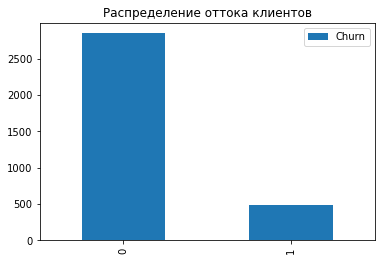

In [ ]:
df['Churn'].value_counts().plot(kind = 'bar', label = 'Churn')
plt.legend()
plt.title('Распределение оттока клиентов')